## **Sales Prediction - Exercise**
*Ngày 18 tháng 10 năm 2024*

### **1. Linear Regression**

#### *1.1 Linear Regression Implementation*

In [20]:
import numpy as np

class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []
    
    def compute_loss(self, y_pred, y_target):
        """Compute Mean Squared Error loss"""
        loss = np.sum((y_pred - y_target)**2) / (2 * self.num_samples)
        return loss
    
    def predict(self, X_data):
        """Make predictions using current weights"""
        y_pred = X_data.dot(self.theta)
        return y_pred
    
    def fit(self):
        """Train the model using gradient descent"""
        for epoch in range(self.num_epochs):
            # Make predictions
            y_pred = self.predict(self.X_data)
            
            # Compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)
            
            # Compute gradient
            loss_grd = 2*(y_pred - self.y_target) / self.num_samples
            gradients = self.X_data.T.dot(loss_grd)
            
            # Update weights
            self.theta = self.theta - self.learning_rate * gradients
            
            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')
        
        return {
            'loss': sum(self.losses) / len(self.losses),
            'weight': self.theta
        }

#### *1.2 R2 Score Implementation*

In [21]:
def r2score(y_pred, y):
    """Calculate the coefficient of determination (R2 score)
    
    Args:
        y_pred: Predicted values
        y: Actual values
    
    Returns:
        float: R2 score
    """
    rss = np.sum((y_pred - y)**2)  # Residual sum of squares
    tss = np.sum((y - y.mean())**2)  # Total sum of squares
    r2 = 1 - (rss / tss)
    return r2

#### *1.3 Test R2 Score*

In [22]:
# Test case 1: Perfect prediction
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
print("Case 1 R2 Score (Perfect Prediction):", r2score(y_pred, y))

# Test case 2: Imperfect prediction
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
print("Case 2 R2 Score (Imperfect Prediction):", r2score(y_pred, y))

Case 1 R2 Score (Perfect Prediction): 1.0
Case 2 R2 Score (Imperfect Prediction): -2.235294117647059


### **2. Polynomial Regression**

#### *2.1 Single Variable Polynomial Features Implementation*

In [23]:
def create_polynomial_features_single(X, degree=2):
    """Creates polynomial features for single variable data
    
    Args:
        X: Input array of shape (n_samples, 1)
        degree: Maximum polynomial degree
    
    Returns:
        Array containing polynomial features up to specified degree
    """
    X_new = X
    for d in range(2, degree+1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

# Test with single variable data
X = np.array([[1], [2], [3]])
X_poly = create_polynomial_features_single(X, degree=2)
print("Single variable polynomial features:\n", X_poly)

Single variable polynomial features:
 [[1 1]
 [2 4]
 [3 9]]


#### *2.2 Multiple Variable Polynomial Features Implementation*

In [24]:
def create_polynomial_features(X, degree=2):
    """Creates polynomial features for multiple variable data
    
    Args:
        X: Input array of shape (n_samples, n_features)
        degree: Maximum polynomial degree
    
    Returns:
        Array containing polynomial features up to specified degree
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

# Test with multi-variable data
X = np.array([[1, 2],
              [2, 3],
              [3, 4]])
X_poly = create_polynomial_features(X, degree=2)
print("Multi-variable polynomial features:\n", X_poly)

Multi-variable polynomial features:
 [[ 1  1  2  4]
 [ 2  4  3  9]
 [ 3  9  4 16]]


### **3. Sales Prediction**

#### *3.1 Data Loading and Preparation*

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('SalesPrediction.csv')

# One-hot encoding for Influencer column
df = pd.get_dummies(df)

# Handle missing values with mean imputation
df = df.fillna(df.mean())

# Prepare features and target
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 
        'Influencer_Micro', 'Influencer_Nano']]
y = df[['Sales']]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=0
)

#### *3.2 Feature Scaling*

In [26]:
# Standardize features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

print("Mean of first feature:", scaler.mean_[0])

Mean of first feature: 54.173577723283785


#### *3.3 Create Polynomial Features and Train Model*

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed)
X_test_poly = poly_features.transform(X_test_processed)

# Train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions and evaluate
preds = poly_model.predict(X_test_poly)
score = r2_score(y_test, preds)
print(f"Model R2 Score: {score}")

Model R2 Score: 0.9951495665310948


### *3.4 Visualize Results (Optional)*

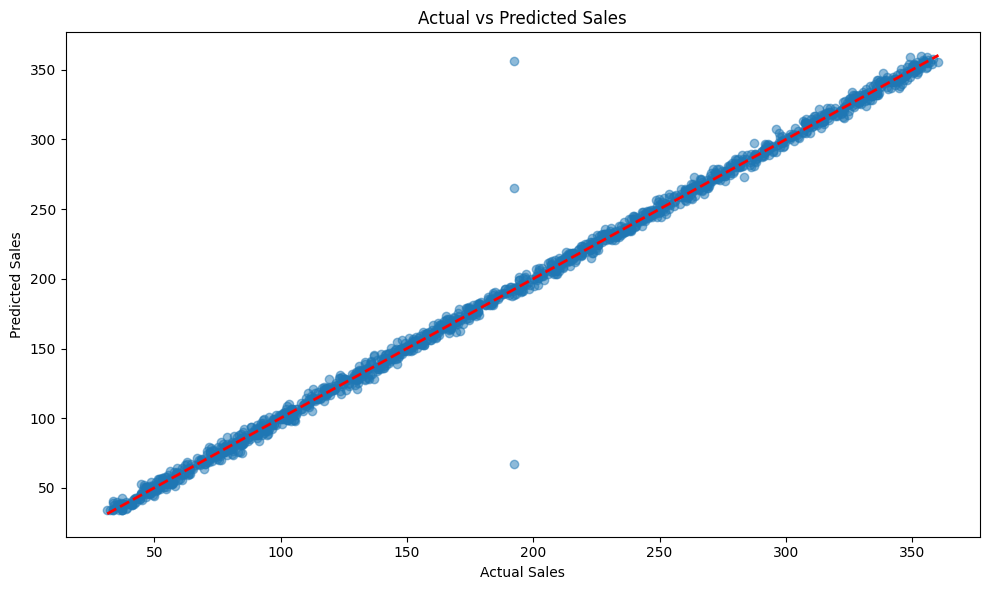

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show()